##  Segunda Análise Regressivo Simbólica da Solução do Poço quadrado de Potencial Infinito 

## Via da Independência Temporal...

## A equação de Schrödinger:
## $$\hat H\psi(x)=E\psi(x)$$ 

Primeiras energias (autovalores):
[9.77135001e+00 3.90848003e+01 8.79385517e+01 1.56329606e+02
 2.44253765e+02 3.51705632e+02 4.78678612e+02 6.25164913e+02
 7.91155542e+02 9.76640313e+02 1.18160784e+03 1.40604554e+03
 1.64993965e+03 1.91327518e+03 2.19603598e+03 2.49820470e+03
 2.81976278e+03 3.16069049e+03 3.52096691e+03 3.90056992e+03
 4.29947622e+03 4.71766133e+03 5.15509958e+03 5.61176413e+03
 6.08762694e+03 6.58265881e+03 7.09682935e+03 7.63010701e+03
 8.18245905e+03 8.75385157e+03 9.34424950e+03 9.95361661e+03
 1.05819155e+04 1.12291076e+04 1.18951531e+04 1.25800113e+04
 1.32836401e+04 1.40059962e+04 1.47470354e+04 1.55067121e+04
 1.62849798e+04 1.70817907e+04 1.78970958e+04 1.87308451e+04
 1.95829875e+04 2.04534707e+04 2.13422411e+04 2.22492443e+04
 2.31744247e+04 2.41177253e+04]


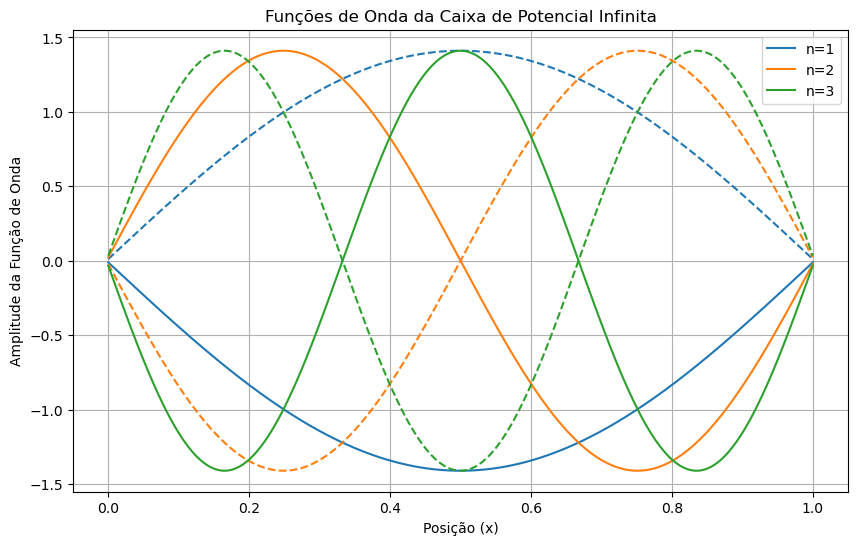

In [11]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  # Comprimento da caixa
N = 400  # Número de pontos de discretização


x = np.linspace(0, L, N)
dx = x[1] - x[0] # Passo espacial

# Matriz Hamiltoniana (H = T + V)
# T: Termo de energia cinética (segunda derivada)
# V: Termo de energia potencial

main_diag = 2 * np.ones(N) / dx**2
off_diag = -1 * np.ones(N-1) / dx**2

H = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# --- Solução da Equação de Schrödinger Independente do Tempo ---
# H * psi = E * psi
# Encontrar autovalores (E) e autovetores (psi)
autovalores, autovetores = np.linalg.eig(H)

idx_ordenado = np.argsort(autovalores)
autovalores_ordenados = autovalores[idx_ordenado]
autovetores_ordenados = autovetores[:, idx_ordenado]

for i in range(len(autovalores_ordenados)):
    autovetores_ordenados[:, i] = autovetores_ordenados[:, i] / np.sqrt(np.trapezoid(autovetores_ordenados[:, i]**2, x))

print("Primeiras energias (autovalores):")
print(autovalores_ordenados[:50])

plt.figure(figsize=(10, 6))

for i in range(3): 
    plt.plot(x, autovetores_ordenados[:, i], label=f'n={i+1}')
    plt.plot(x, -autovetores_ordenados[:, i], '--', color=plt.gca().lines[-1].get_color()) # Adicionar o reflexo para visualizar a forma
y=autovetores_ordenados[:, 1]
plt.title('Funções de Onda da Caixa de Potencial Infinita')
plt.xlabel('Posição (x)')
plt.ylabel('Amplitude da Função de Onda')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import sklearn
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils.random import check_random_state
import graphviz

In [13]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Bibioteca PYSR

In [14]:
import pysr

In [15]:
equations = pysr.PySRRegressor(
    niterations=40,
    binary_operators=["+", "*"],  # operators that can combine two terms
    unary_operators=["sin"],  # operators that modify a single term
)
equations.fit(X_train.reshape(-1,1), y_train)

C:\Users\USER\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.200e+04
Progress: 470 / 1240 total iterations (37.903%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.003e+00  0.000e+00  y = -0.042211
3           8.251e-01  9.769e-02  y = x₀ * -0.7297
4           8.451e-02  2.279e+00  y = sin(x₀ * 6.1977)
6           6.195e-05  3.609e+00  y = sin(x₀ * 6.2754) * 1.413
8           5.649e-09  4.651e+00  y = sin((x₀ + -1.0025) * 6.2516) * 1.4106
10          3.137e-09  2.941e-01  y = sin((x₀ + (x₀ * 5.2517)) + 0.01577) * 1.4107
12          1.887e-09  2.541e-01  y = sin((((x₀ + -0.32365) * 1.1105) + 0.36221) * -5.6295) ...
                                      * -1.4107
16          1.731e-09  2.157e-02  y = sin((((((x₀ + -0.29519) * 0.86377) + 0.48284) * -3.123...
                                      2) + 0.70

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.003e+00  0.000e+00  y = -0.042211
3           8.251e-01  9.769e-02  y = x₀ * -0.7297
4           8.451e-02  2.279e+00  y = sin(x₀ * 6.1977)
6           6.195e-05  3.609e+00  y = sin(x₀ * 6.2754) * 1.413
8           4.169e-09  4.803e+00  y = sin((x₀ * 6.2516) + 0.015783) * 1.4107
10          3.689e-10  1.212e+00  y = sin((x₀ * 5.2518) + (x₀ + 0.015686)) * 1.4107
12          3.139e-10  8.070e-02  y = sin((((x₀ + x₀) + -0.40181) * 3.1259) + 1.2717) * 1.41...
                                      07
14          1.255e-10  4.583e-01  y = sin((x₀ * 6.939) + (((x₀ + x₀) + -0.045639) * -0.34362...
                                      )) * 1.4107
16          6.140e-12  1.509e+00  y = sin((((x₀ + (x₀ + -0.26035)) * 0.00025856) + (x₀ * 6.2...
                                      513)) + 0.015737) * 1.4107
22          3.512e-12  9.312e-02  y

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       -0.042210586   
	1         0.097689                                   x0 * -0.72970486   
	2         2.278588                                sin(x0 * 6.1976614)   
	3         3.609174                     sin(x0 * 6.2753577) * 1.413018   
	4         4.803256    sin((x0 * 6.2516236) + 0.015782664) * 1.4106647   
	5         1.212463  sin((x0 * 5.251798) + (x0 + 0.015686126)) * 1....   
	6         0.080697  sin((((x0 + x0) + -0.40180737) * 3.1259077) + ...   
	7         0.458324  sin((x0 * 6.939049) + (((x0 + x0) + -0.0456394...   
	8         1.508766  sin((((x0 + (x0 + -0.2603452)) * 0.00025856163...   
	9   >>>>  0.093118  sin((x0 * 6.251325) + ((((x0 + 0.98999506) * 1...   
	10        0.069730  sin((((x0 * 6.251317) + ((x0 + (x0 + x0)) * 6....   
	11        0.000667  sin(((((x0 * 6.251317) + 0.01572739) + (((x0 +...   
	12        0.006220  sin((((x0 * 6.251317) + ((x0 + (sin(x0) + x0))...   
	
	            loss  complexity  
	0   1.003144e+00           1  
	1   8.251095e-01           3  
	2   8.451489e-02           4  
	3   6.195041e-05           6  
	4   4.168585e-09           8  
	5   3.688560e-10          10  
	6   3.138805e-10          12  
	7   1.255073e-10          14  
	8   6.140047e-12          16  
	9   3.511780e-12          22  
	10  3.054643e-12          24  
	11  3.050570e-12          26  
	12  3.031656e-12          27  
]

In [16]:
def round_expr(expr, num_digits=4):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(Number)})

In [17]:
round_expr(equations.sympy())

1.4107*sin(6.2519*x0 + 0.01562)

In [18]:
equations.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,1.003144e+00,-0.042210586,0.000000,-0.0422105860000000,PySRFunction(X=>-0.0422105860000000)
1,3,8.251095e-01,x0 * -0.72970486,0.097689,x0*(-0.72970486),PySRFunction(X=>x0*(-0.72970486))
2,4,8.451489e-02,sin(x0 * 6.1976614),2.278588,sin(x0*6.1976614),PySRFunction(X=>sin(x0*6.1976614))
3,6,6.195041e-05,sin(x0 * 6.2753577) * 1.413018,3.609174,sin(x0*6.2753577)*1.413018,PySRFunction(X=>sin(x0*6.2753577)*1.413018)
4,8,4.168585e-09,sin((x0 * 6.2516236) + 0.015782664) * 1.4106647,4.803256,sin(x0*6.2516236 + 0.015782664)*1.4106647,PySRFunction(X=>sin(x0*6.2516236 + 0.015782664...
5,10,3.688560e-10,sin((x0 * 5.251798) + (x0 + 0.015686126)) * 1....,1.212463,sin(x0 + x0*5.251798 + 0.015686126)*1.4106928,PySRFunction(X=>sin(x0 + x0*5.251798 + 0.01568...
6,12,3.138805e-10,sin((((x0 + x0) + -0.40180737) * 3.1259077) + ...,0.080697,sin((x0 + x0 - 0.40180737)*3.1259077 + 1.27169...,PySRFunction(X=>sin((x0 + x0 - 0.40180737)*3.1...
7,14,1.255073e-10,sin((x0 * 6.939049) + (((x0 + x0) + -0.0456394...,0.458324,sin(x0*6.939049 + (x0 + x0 - 0.045639478)*(-0....,PySRFunction(X=>sin(x0*6.939049 + (x0 + x0 - 0...
8,16,6.140047e-12,sin((((x0 + (x0 + -0.2603452)) * 0.00025856163...,1.508766,sin(x0*6.251329 + (x0 + x0 - 0.2603452)*0.0002...,PySRFunction(X=>sin(x0*6.251329 + (x0 + x0 - 0...
9,22,3.511780e-12,sin((x0 * 6.251325) + ((((x0 + 0.98999506) * 1...,0.093118,sin(x0*6.251325 + (x0 + 0.98999506)*1.09913235...,PySRFunction(X=>sin(x0*6.251325 + (x0 + 0.9899...


In [19]:
equations.equations_.loss

0     1.003144e+00
1     8.251095e-01
2     8.451489e-02
3     6.195041e-05
4     4.168585e-09
5     3.688560e-10
6     3.138805e-10
7     1.255073e-10
8     6.140047e-12
9     3.511780e-12
10    3.054643e-12
11    3.050570e-12
12    3.031656e-12
Name: loss, dtype: float64

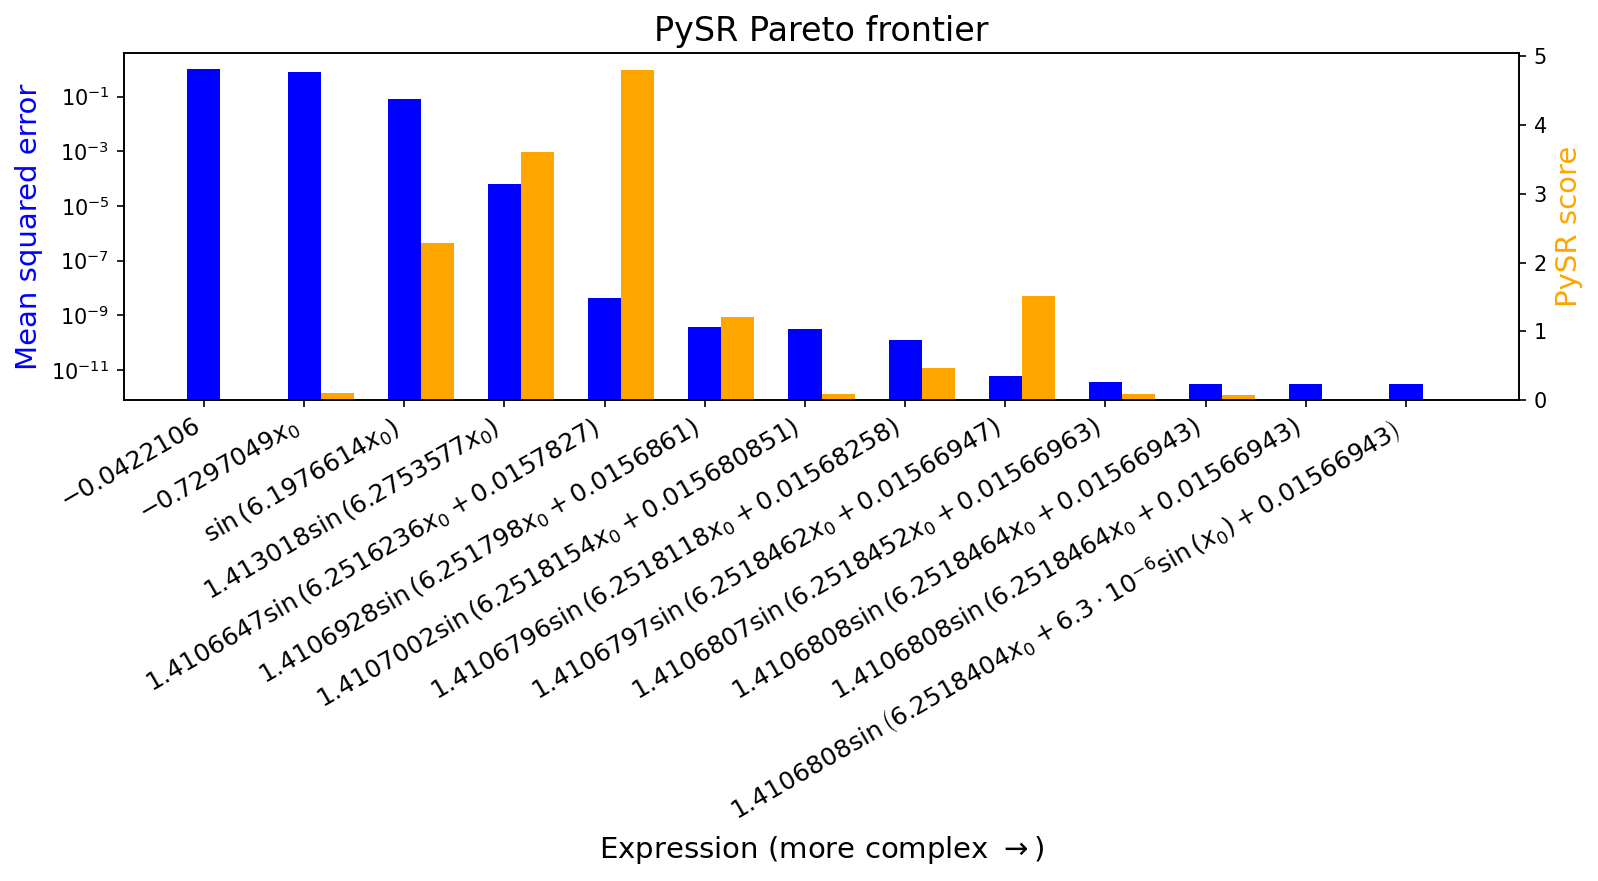

In [20]:
plt.figure(figsize=(12, 3), dpi=150)
plt.bar(
    np.arange(len(equations.equations_)),
    equations.equations_.loss,
    width=0.33,
    color="blue",
)


plt.yscale("log")
plt.ylabel("Mean squared error", fontsize=14, color="blue")
plt.xticks(
    range(len(equations.equations_)),
    [f"${latex(round_expr(v,7))}$" for v in equations.equations_.sympy_format],
    rotation=30,
    ha="right",
    fontsize=12,
)
plt.title("PySR Pareto frontier", fontsize=16)
plt.xlabel("Expression (more complex $\\to$)", fontsize=14)

ax2 = plt.twinx()
ax2.bar(
    np.arange(len(equations.equations_)) + 0.33,
    equations.equations_.score,
    width=0.33,
    color="orange",
)
ax2.set_ylabel("PySR score", color="orange", fontsize=14)

plt.show()

In [2]:
import pandas as pd

# Replace with the actual filename generated
hall_of_fame_df = pd.read_csv("outputs/20251012_011508_3HN2Gm/hall_of_fame.csv")
count=0
equ=hall_of_fame_df.Equation
for i in equ:
    print("f(x0)",count,'=',i)
    print('---')
    count+=1

f(x0) 0 = -0.042210586
---
f(x0) 1 = x0 * -0.72970486
---
f(x0) 2 = sin(x0 * 6.1976614)
---
f(x0) 3 = sin(x0 * 6.2753577) * 1.413018
---
f(x0) 4 = sin((x0 * 6.2516236) + 0.015782664) * 1.4106647
---
f(x0) 5 = sin((x0 * 5.251798) + (x0 + 0.015686126)) * 1.4106928
---
f(x0) 6 = sin((((x0 + x0) + -0.40180737) * 3.1259077) + 1.2716937) * 1.4107002
---
f(x0) 7 = sin((x0 * 6.939049) + (((x0 + x0) + -0.045639478) * -0.34361863)) * 1.4106796
---
f(x0) 8 = sin((((x0 + (x0 + -0.2603452)) * 0.00025856163) + (x0 * 6.251329)) + 0.015736796) * 1.4106797
---
f(x0) 9 = sin((x0 * 6.251325) + ((((x0 + 0.98999506) * 1.09913235e-5) + 0.015725782) + ((x0 + (x0 + -0.2633797)) * 0.00025455933))) * 1.4106807
---
f(x0) 10 = sin((((x0 * 6.251317) + ((x0 + (x0 + x0)) * 6.2172926e-6)) + 0.015736697) + (((x0 + -0.2633797) + x0) * 0.00025544464)) * 1.4106808
---
f(x0) 11 = sin(((((x0 * 6.251317) + 0.01572739) + (((x0 + x0) + x0) * 6.2320155e-6)) + 9.286178e-6) + (((x0 + -0.2633797) + x0) * 0.00025541644)) * 1.41068